In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:

fruits_df = pd.read_table('fruit_data_with_colors.txt')
fruits_df.head()
fruits_df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [20]:

fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [21]:

X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

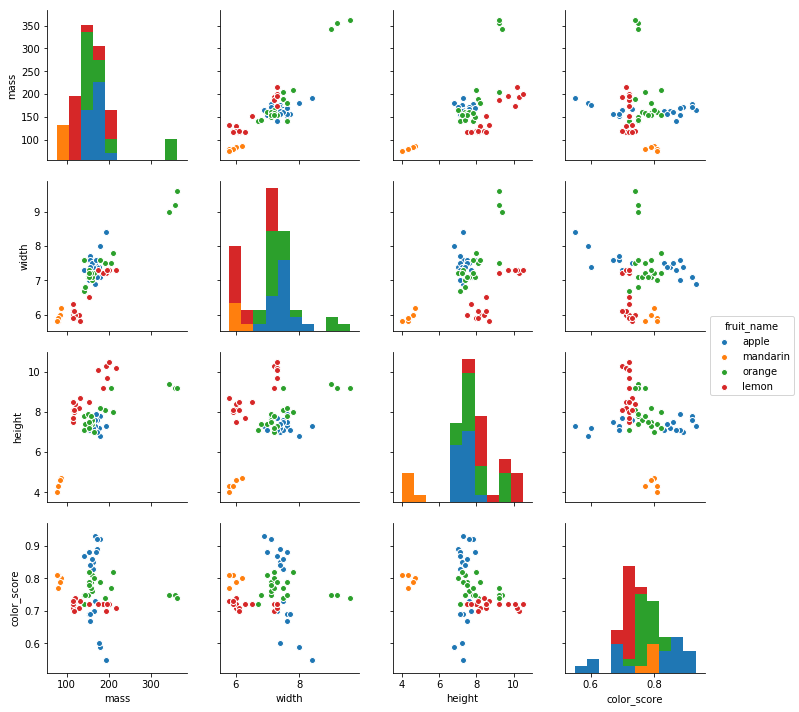

In [22]:

sns.pairplot(data=fruits_df, hue='fruit_name', vars=['mass', 'width', 'height', 'color_score'])

<IPython.core.display.Javascript object>


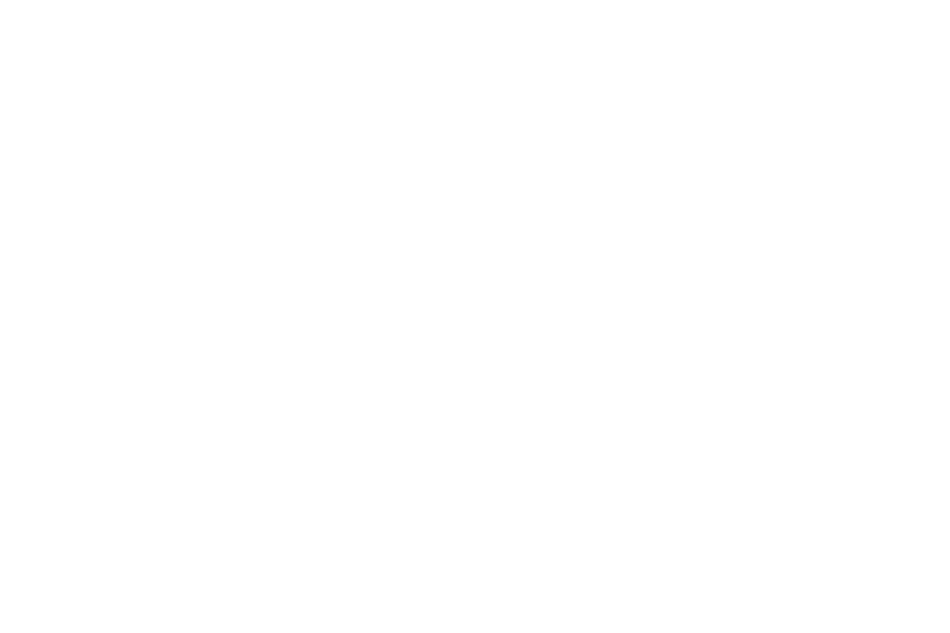

<IPython.core.display.Javascript object>


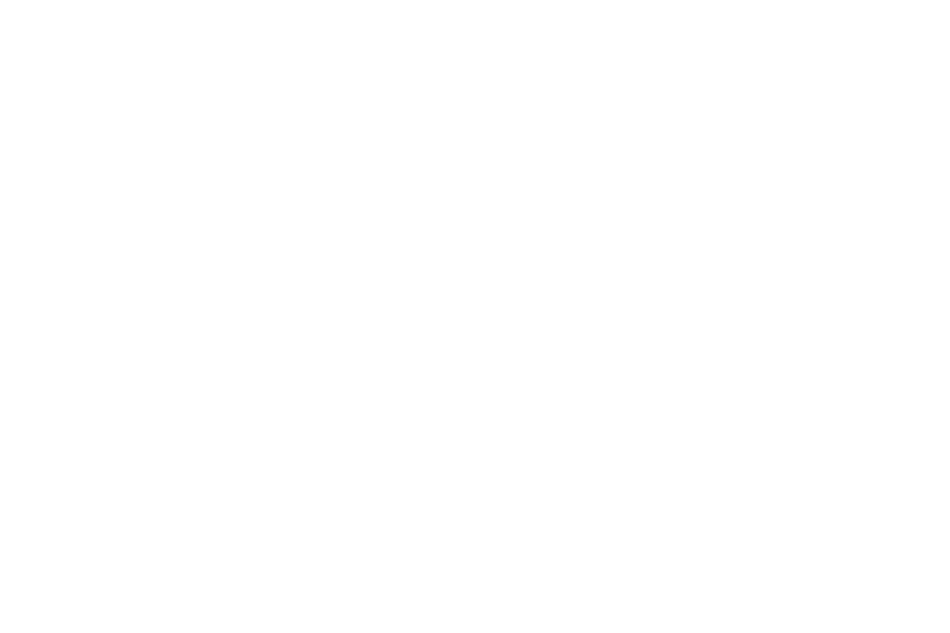

In [23]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
colors = list(map(lambda label: label_color_dict[label], y_train))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred = knn.predict(X_test)
print(y_pred)

[3 1 4 4 1 1 3 3 1 4 2 1]


In [27]:
y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
Name: fruit_label, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('acc：', acc)

acc： 0.5833333333333334


<IPython.core.display.Javascript object>


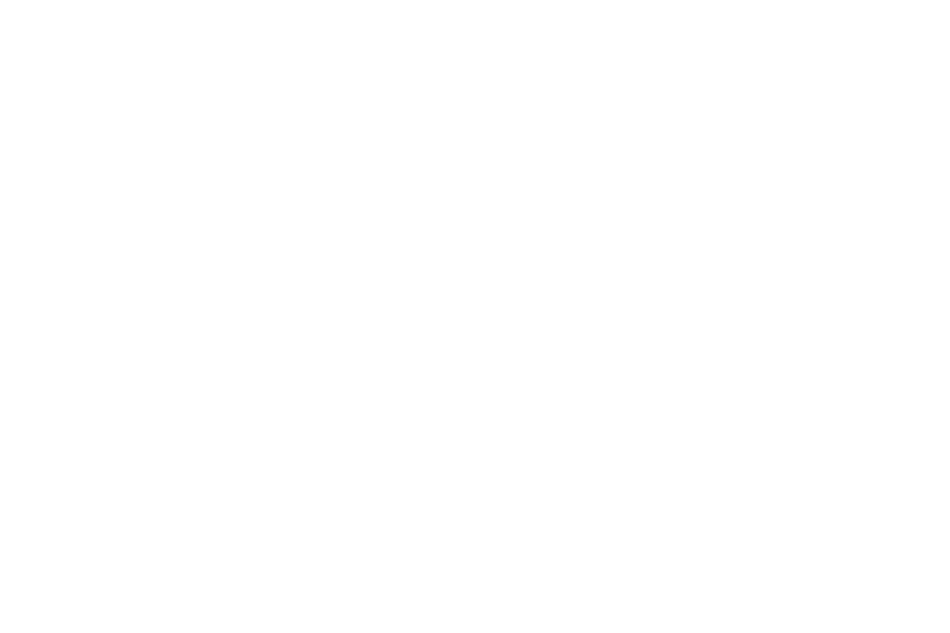

([<matplotlib.axis.XTick at 0x10c8025c0>,
 <a list of 5 Text xticklabel objects>)

<IPython.core.display.Javascript object>


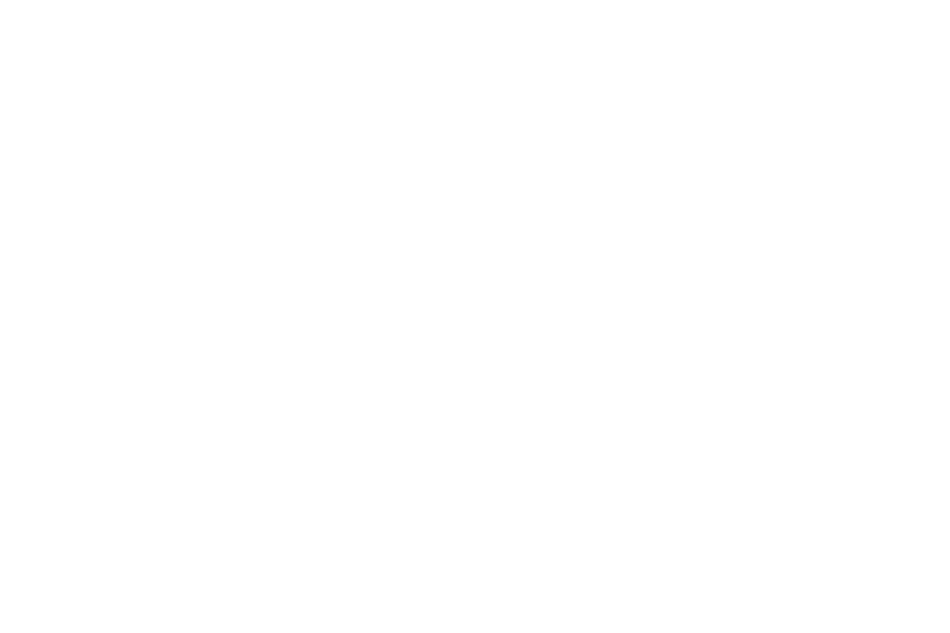

In [29]:
k_range = range(1, 20)
acc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, acc_scores, marker='o')
plt.xticks([0, 5, 10, 15, 20])